epoch: 1, loss: 0.6109
epoch: 11, loss: 0.5009
epoch: 21, loss: 0.4325
epoch: 31, loss: 0.3855
epoch: 41, loss: 0.3509
epoch: 51, loss: 0.3241
epoch: 61, loss: 0.3025
epoch: 71, loss: 0.2848
epoch: 81, loss: 0.2698
epoch: 91, loss: 0.2570
accuracy: 0.8947


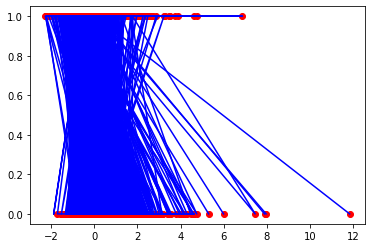

In [9]:
### Logistic Regression
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as ply

#---------------------
# 0. prepare data
#---------------------
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# convert numpy array to tensor
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

# reshape y
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

#---------------------
# 1. get model
#---------------------
# f = wx + b, sigmoid at the end
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
        
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted
    
model = LogisticRegression(n_features)

#-----------------------
# 2. loss and optimizer
#-----------------------
learning_rate = 0.01
criterion = nn.BCELoss() #Binary Entropy Loss
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#---------------------
# 3. training loop
#---------------------
num_epoch = 100
for epoch in range(num_epoch):
    # forward pass
    y_predict = model(X_train)
    loss = criterion(y_predict, y_train)
    
    # backward pass
    loss.backward()
    
    # update weight
    optimizer.step()
    
    # zero gradient
    optimizer.zero_grad()
    
    if epoch%10 == 0:
        print(f'epoch: {epoch+1}, loss: {loss.item():.4f}')   

#---------------------
# 4. accuracy
#---------------------
with torch.no_grad():
    predicted = model(X_test)
    predicted_cls = predicted.round() # convert output to 0 or 1
    accuracy = predicted_cls.eq(y_test).sum() / y_test.shape[0]
    print(f'accuracy: {accuracy:.4f}')